<a href="https://colab.research.google.com/github/agoritma/brain-tumor-classification/blob/main/brain_tumor_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Dependencies

In [1]:
!pip install kagglehub

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Downloading Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rm1000/brain-tumor-mri-scans")

print("Path to dataset files:", path)

100%|██████████| 236M/236M [00:04<00:00, 59.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1


In [4]:
!ls /root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1

glioma	healthy  meningioma  pituitary


## Load Dataset

In [5]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
image_size = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 64
BUFFER_SIZE = tf.data.AUTOTUNE

dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode='grayscale'
)

dataset = dataset.cache().prefetch(buffer_size=BUFFER_SIZE)

Found 7023 files belonging to 4 classes.


1


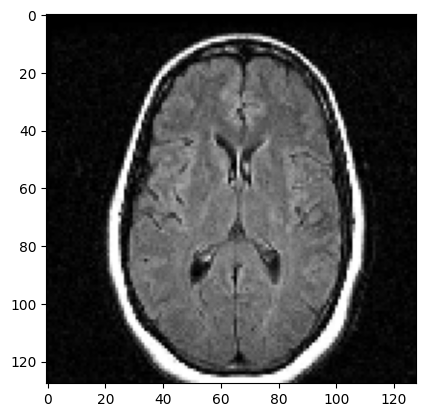

1


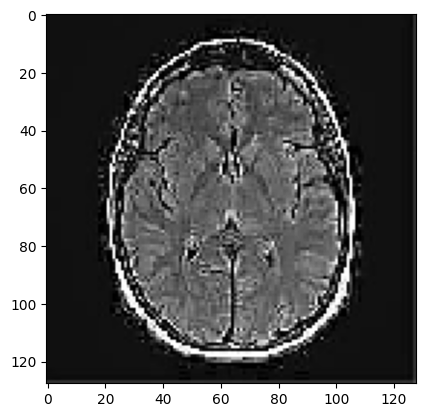

In [6]:
for x, y in dataset.take(2):
  print(np.argmax(y))
  plt.imshow(x[0], cmap="gray")
  plt.show()

## Split Dataset

In [228]:
dataset_train = dataset.take(int(len(dataset) * 0.8))
dataset_test = dataset.skip(int(len(dataset) * 0.8))

## Creating Model

In [293]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(128, 128, 1)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [294]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', 'f1_score'])

In [295]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_24 (Rescaling)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 126, 126, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_24 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,637,828 (6.25 MB)

 Trainable params: 1,637,700 (6.25 MB)

 Non-trainable params: 128 (512.00 B)

In [296]:
history = model.fit(dataset_train, epochs=50, validation_data=dataset_test)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6947 - f1_score: 0.6773 - loss: 0.7826 - val_accuracy: 0.3027 - val_f1_score: 0.1472 - val_loss: 1.2999
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8655 - f1_score: 0.8579 - loss: 0.3615 - val_accuracy: 0.3530 - val_f1_score: 0.2227 - val_loss: 1.2197
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9245 - f1_score: 0.9199 - loss: 0.2106 - val_accuracy: 0.6104 - val_f1_score: 0.5976 - val_loss: 0.9091
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9569 - f1_score: 0.9540 - loss: 0.1292 - val_accuracy: 0.9087 - val_f1_score: 0.9024 - val_loss: 0.4388
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9619 - f1_score: 0.9601 - loss: 0.1038 - val_accuracy: 0.9087 - val_f1_score: 0.9069 - val_loss: 0.3470
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9703 - f1_score: 0.9687 - loss: 0.0756 - val_accuracy: 0.8792 - val_f1_score: 0.8785 - val

## Evaluate Model

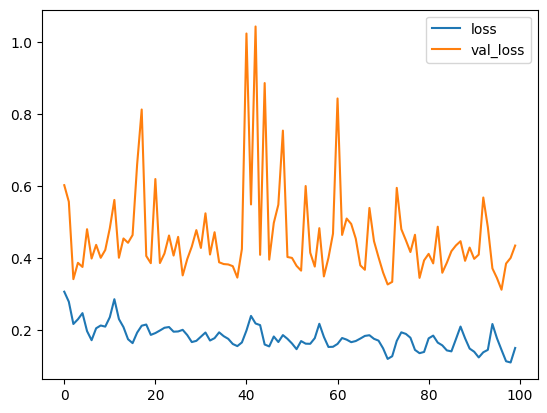

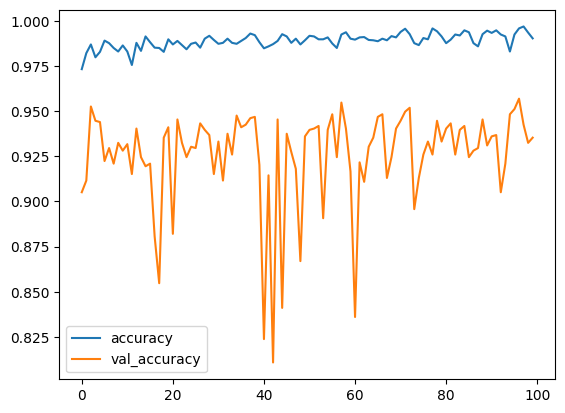

In [276]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [297]:
model.evaluate(dataset_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9521 - f1_score: 0.9512 - loss: 0.3646


[0.32286983728408813,
 0.9561466574668884,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9426356 , 0.9788293 , 0.90937495, 0.9855907 ], dtype=float32)>]

In [171]:
class_map = {
    0: "glioma_tumor",
    1: "normal",
    2: "meningioma_tumor",
    3: "pituitary_tumor"
}

(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Ground Truth: normal
Prediction: normal


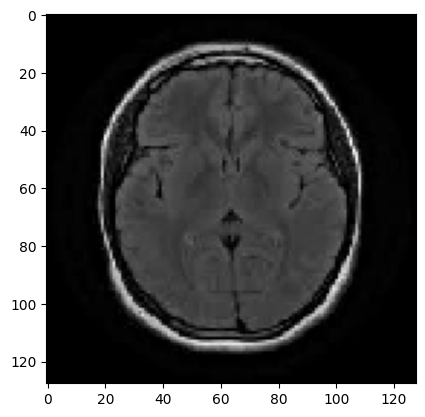


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Ground Truth: meningioma_tumor
Prediction: meningioma_tumor


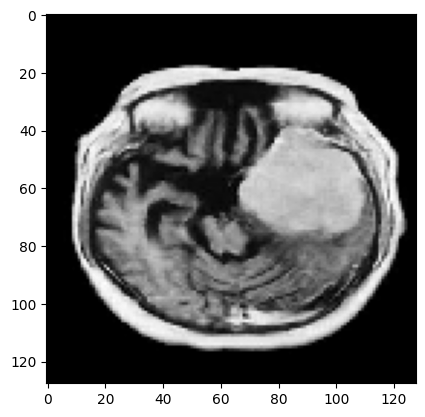


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ground Truth: meningioma_tumor
Prediction: meningioma_tumor


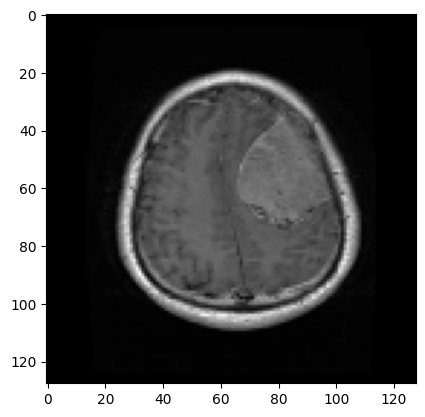


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Ground Truth: normal
Prediction: normal


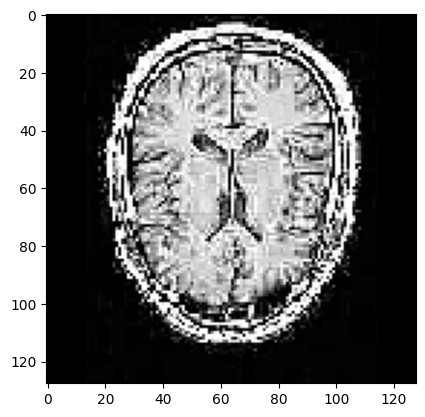


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ground Truth: normal
Prediction: normal


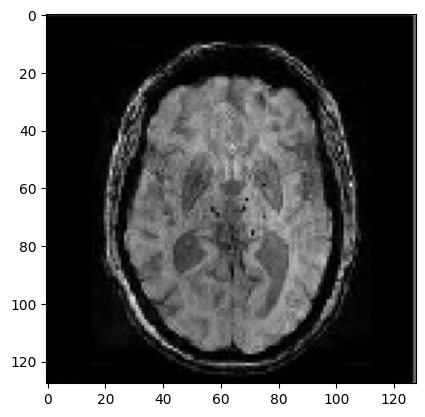


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ground Truth: normal
Prediction: normal


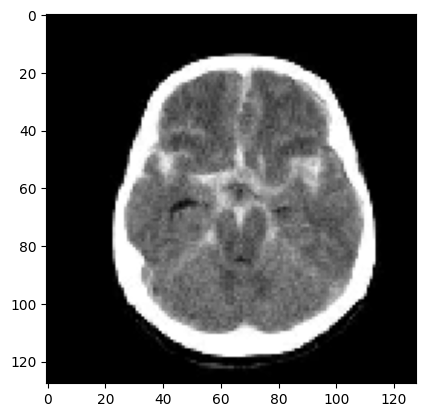


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ground Truth: pituitary_tumor
Prediction: pituitary_tumor


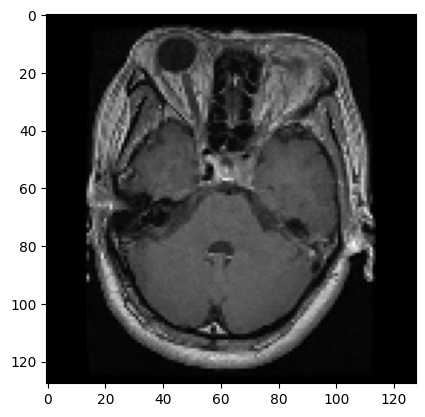


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ground Truth: meningioma_tumor
Prediction: normal


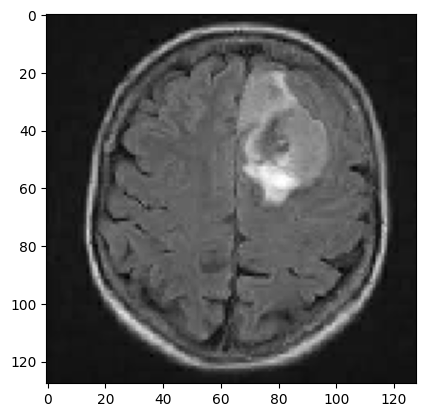


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Ground Truth: glioma_tumor
Prediction: glioma_tumor


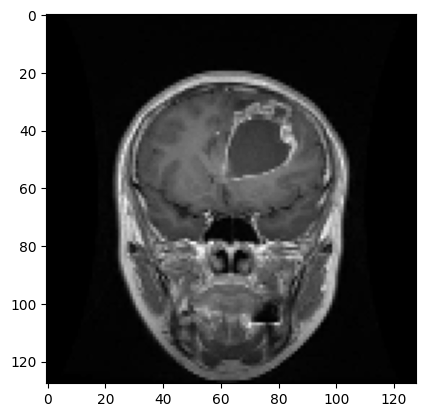


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ground Truth: meningioma_tumor
Prediction: meningioma_tumor


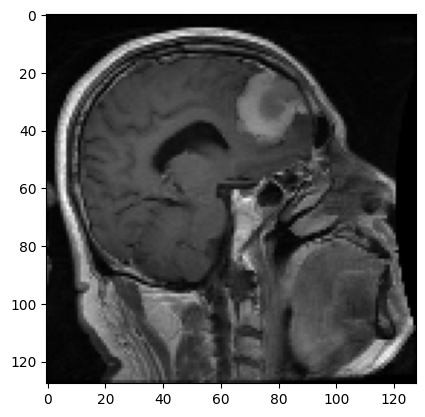


(64, 128, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ground Truth: pituitary_tumor
Prediction: pituitary_tumor


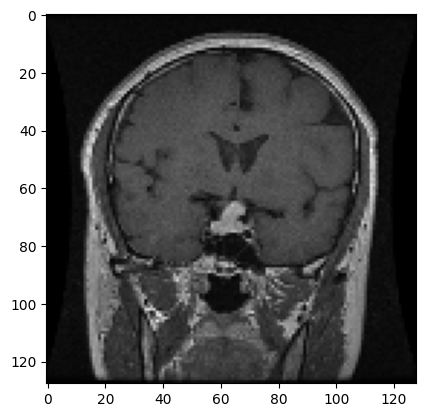

In [298]:
for x, y in dataset_test.take(11):
  print(x.shape)
  y_ground = np.argmax(y)
  y_pred = model.predict(x)
  # if y_ground != np.argmax(y_pred[0], axis=0):
  print("Ground Truth:", class_map[y_ground])
  print("Prediction:", class_map[np.argmax(y_pred[0], axis=0)])
  plt.imshow(x[0], cmap="gray")
  plt.show()
  print()

## Export Model

In [173]:
model.export("brain_tumor_classifier")
model.save("brain_tumor_classifier.h5")

Saved artifact at 'brain_tumor_classifier'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='keras_tensor_195')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  140554948626560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554948632016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554948625152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554948634480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554948633600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554948636240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554948632192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554948638176: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [59]:
!zip -r brain_tumor_classifier.zip brain_tumor_classifier

  adding: brain_tumor_classifier/ (stored 0%)
  adding: brain_tumor_classifier/variables/ (stored 0%)
  adding: brain_tumor_classifier/variables/variables.index (deflated 61%)
  adding: brain_tumor_classifier/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: brain_tumor_classifier/assets/ (stored 0%)
  adding: brain_tumor_classifier/saved_model.pb (deflated 85%)
  adding: brain_tumor_classifier/fingerprint.pb (stored 0%)


## Test Model with other images

In [236]:
from PIL import Image
from google.colab import files

Saving IMG-0017-00030_big_gallery.jpeg to IMG-0017-00030_big_gallery (1).jpeg
Saving 9b3c24072a2568610b99707aa719ce850ac5b3ac515d6abb3692649109cf19e9_big_gallery.jpeg to 9b3c24072a2568610b99707aa719ce850ac5b3ac515d6abb3692649109cf19e9_big_gallery (4).jpeg
Saving big_5b252c1a32b7d.jpg to big_5b252c1a32b7d (4).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Prediction: glioma_tumor


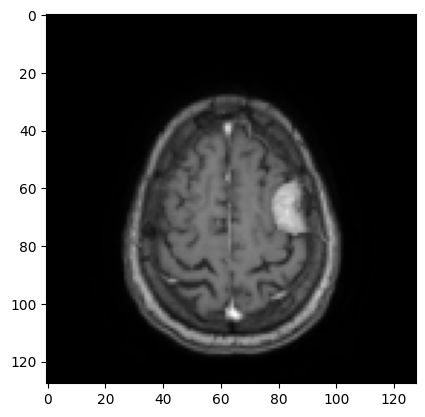

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: meningioma_tumor


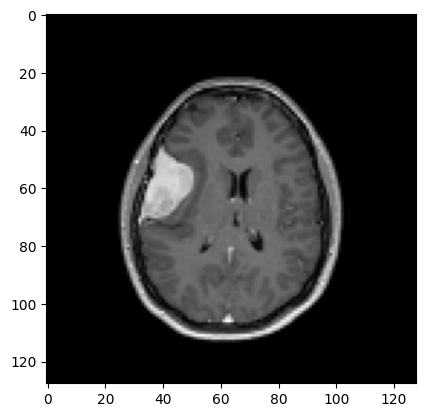

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: normal


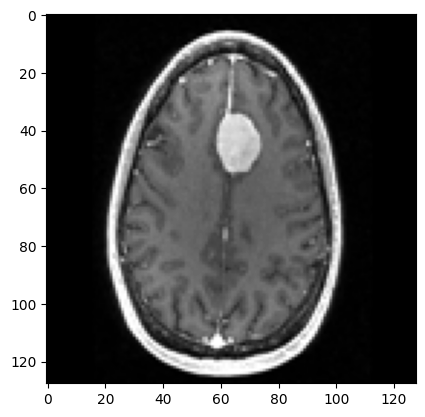

In [255]:
uploaded_file = files.upload()

for file_name in uploaded_file.keys():
  img = Image.open(file_name)
  img = img.resize((128, 128))
  img = img.convert("L")
  img = np.array(img)
  img = np.expand_dims(img, axis=0)
  img = np.expand_dims(img, axis=-1)

  y_pred = model.predict(img)
  print("Prediction:", class_map[np.argmax(y_pred[0], axis=0)])
  plt.imshow(img[0, :, :, 0], cmap="gray")
  plt.show()